# 4.1_线性回归

公式4-1：线性回归模型预测

$$\hat y=\theta_0+\theta_1x_1+\theta_2x_2+···+\theta_nx_n$$

$\hat y$是预测值；

n是特征向量；

$x_i$是第i个特征值；

$\theta_j$是第j个模型参数（包括偏差和特征权重）

公式4-2：线性回归模型预测（向量化的形式）

$$\hat y=h_\theta(x)=\overrightarrow{\theta}·\overrightarrow{x}$$

在第二章的时候我们对于回归的性能指标的选用上使用的是RMSE，但是在实践中，MSE(均方误差)相比RMSE更为简单，而且效果一样

公式4-3：线性回归模型的MSE成本函数

$$ MSE=(X,h_\theta)=\frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^i-y^i)^2   $$

# 4.1.1_标准方程

标准方程：求成本函数中的$\theta$值的一个闭式解方法（线性回归模型的数学推导）

$$ \hat \theta=(X^TX)^{-1}X^Ty $$

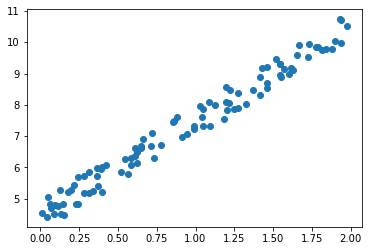

In [46]:
import numpy as np
import matplotlib.pyplot as plt

#随机生成一些数据
X = 2 * np.random.rand(100,1)    #在0-1之间取100个数 返回列数组
y = 4 + 3 * X + np.random.rand(100,1)
plt.scatter(X,y)   #scatter代表散点图
plt.show()

接下来用公式4-4计算$ \hat\theta$的值

### np.linalg是Numpy的线性代数模块，其中inv()函数用于矩阵求逆；dot()方法计算矩阵内积

In [47]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)   #标准方程
theta_best    #其中加入了高斯噪声

array([[4.52688958],
       [2.9692902 ]])

我们期待的是$\theta_0$=4,$\theta_1$=3；得到的有所出入是因为噪声的存在

接下来用$\hat\theta$做预测：

In [48]:
X_new = np.array([[0],[2]])    #X
X_new_b = np.c_[np.ones((2,1)),X_new]    #1,X
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[ 4.52688958],
       [10.46546997]])

上方代码中，一行代表一个自变量的情况（x=0 和 x=2时）：

第一行：y = $\theta_0$*1 + $\theta_1$*0

第二行：y = $\theta_0$*1 + $\theta_1$*2 

绘制预测模型

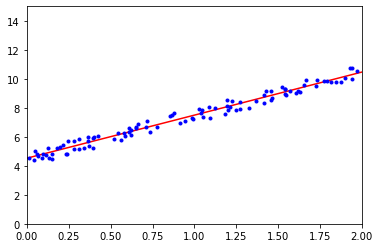

In [49]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

## LinearRegression类：sklearn框架中的线性回归模型

基于scipy.linalg.lstsq()函数（俗称的最小二乘法）

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_    #函数与y轴的交点到原点的距离(截距)

array([4.52688958])

In [51]:
lin_reg.coef_     #斜率

array([[2.9692902]])

In [52]:
lin_reg.predict(X_new)   #结果分别是x=0和x=2时的值

array([[ 4.52688958],
       [10.46546997]])

# 4.1.2_计算复杂度

综上：不论是直接用标准方程还是用框架，原理都是计算$\theta$，在实际中当实例数量增加时，两者的计算都将变得极其缓慢，所以我们将继续探索

# 4.2_梯度下降

为找到最佳的$\theta$（注意此处是所有参数的组合），先使用一个随机的$\theta$，然后逐步改进，直到最后找到MSE最小的$\theta$

其中出现一个问题，当参数之间相差较大时，学习速率会大幅下降，所以我们应该对特征们进行特征缩放

# 4.2.1_批量梯度下降

要实现梯度下降，需要计算每个参数变化对模型总体的影响，就像每个参数的斜率一样，简而言之就是，每改变$\theta_j$，成本函数会改变多少，这被称为偏导数，将每个参数的偏导数组合起来就得到了梯度向量$\vec{\theta}$

一旦有了梯度下降，哪个点线上就朝反方向下坡（因为成本函数是碗状的），用梯度向量乘以学习速率从而求得下坡的步长

梯度下降步骤公式：

$$\theta^{下一步}=\theta-\eta\nabla_\theta MSE(\theta)$$

$\eta$为学习速率


$\nabla_\theta MSE(\theta)$为梯度向量

In [53]:
eta = 0.1   #学习速率
n_iterations = 100
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [54]:
theta

array([[4.51091368],
       [2.98356506]])

而如果采用了其它的学习速率就会导致以下的几类情况

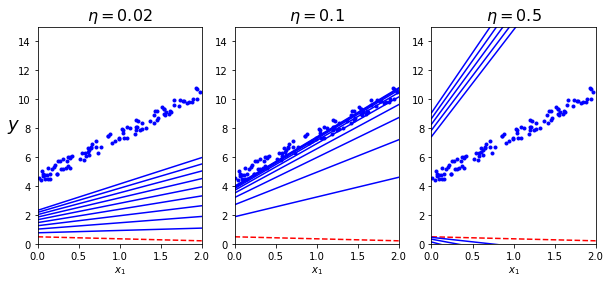

In [55]:
theta_path_bgd = []

def plot_gradient_descent(theta,eta,theta_path=None):   #下降斜率
    m = len(X_b)
    plt.plot(X,y,"b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new,y_predict,style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$",fontsize=10)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta={}$".format(eta),fontsize=16)
    

np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(132); plot_gradient_descent(theta,eta=0.1,theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta,eta=0.5)
plt.show()

## 容差

为找到合适的学习速率，同时不做过多的时间浪费，我们需要限制迭代次数。如果设置的太低，会导致到达不了最优解，设置的太高会导致参数不再变化，但会浪费很多时间。

解决方法：一开始的时候设置一个非常大的迭代次数，当梯度下降的值到达一定范围的时候停止（容差），这时的梯度就基本上马上就要到“碗底”了

# 4.2.2_随机梯度下降

# 4.2.3_小批量梯度下降

# 4.3_多项式回归

用曲线代替直线，用线性模型LinearRegression去拟合非线性数据

In [57]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

## PolynomialFeatures类：

这个类可以进行特征的构造，构造的方式就是特征与特征相乘（自己与自己，自己与其他人），这种方式叫做使用多项式的方式。
例如：有 a、b 两个特征，那么它的 2 次多项式的次数为 [1,a,b,a2,ab,b2]。

PolynomialFeatures 这个类有 3 个参数：

    degree：控制多项式的次数；
    interaction_only：默认为 False，如果指定为 True，那么就不会有特征自己和自己结合的项，组合的特征中没有 a2和 b2；
    include_bias：默认为 True 。如果为 True 的话，那么结果中就会有 0 次幂项，即全为 1 这一列。

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)

In [59]:
X_poly[0]    #x和x^2

array([1.39196365, 1.93756281])

X_poly现在包含x和x的平方，长度为100；现在可以将LinearRegression模型进行拟合

In [60]:
Lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

In [61]:
lin_reg.intercept_    #c

array([1.81272494])

In [62]:
lin_reg.coef_       #b（对应的x）、a（对应的x^2）

array([[0.9457151 , 0.55985611]])

# 4.4_学习曲线

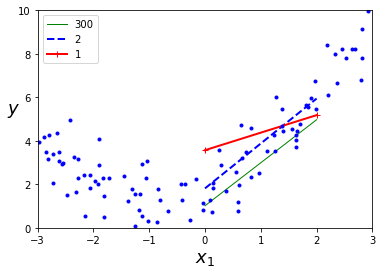

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

关于上方的数据，对比300阶、二阶（二次函数）和纯线性模型（一次函数）,发现300阶严重过拟合，线性模型欠拟合，则二阶可以比较好的拟合；

但是在实际中，我们不知道数据的形状，所以我们有以下两种方法区别某个模型是否过于简单或者过于复杂：

### 方法一：交叉验证（第二章）

通过交叉验证估计模型的泛化性能：

    在训练集上表现良好，而在测试集上泛化较差代表过拟合；
    
    在训练集和测试集上都表现的不好代表欠拟合；

### 方法二：观察学习曲线

生成学习曲线，需要在不同大小的训练集的子集上多次训练即可：

In [22]:
# 绘制学习曲线的函数
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")


观察纯线性模型的学习曲线：

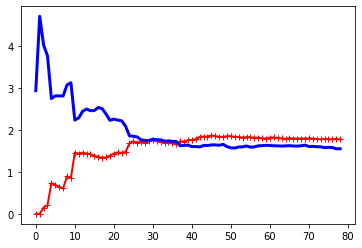

In [23]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

这是典型的欠拟合模型的学习曲线，红色代表训练集，蓝色代表测试集：

    当训练数量很少的时候（只有几个点的时候），模型很容易就可以适配，这也是为什么RMSE（y值）从0开始变化，但是误差会随数量的增加而增加，
    
    而测试集在数量很少的时候模型显然无法正确拟合

而两条曲线会最终走向非常接近，这就是欠拟合的特点

接下里再观察十阶多项式的学习曲线：

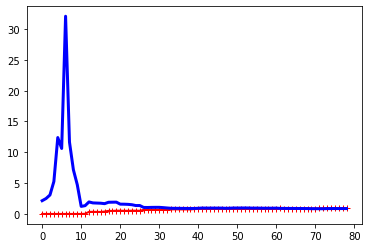

In [24]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])
plot_learning_curves(polynomial_regression,X,y)

(这里显示的不是很明显)
这是过拟合的学习曲线，和欠拟合有一些相似，但是他们有两个主要区别：

    ·与欠拟合的图像相比，误差要低很多
    
    ·曲线之间存在间隙，这代表在训练集上的性能要比测试集上的性格高，这是过拟合的标志


# 偏差和方差的权衡

统计学表明：模型的泛化误差主要由以下三种误差组成：
    
    偏差：对于模型错误的假设（比如以为数据是线性的，实际却是二次的）。高偏差最有可能带来欠拟合。
    
    方差：由于模型对数据过于敏感导致的，其自由度过高，项数过高，因此有可能是过拟合。
    
    不可避免的误差：这部分就是来自数据本身的噪声，唯一解决方式就是清理数据。

增加模型的复杂度会显著提高方差而减少偏差，相反，降低复杂度会导致偏差增加和方差降低，需要根据实际情况进行所谓的“权衡”

# 4.5_正则化线性模型

减少过拟合的好方法是进行正则化，即约束模型：

    他所拥有的自由度越小（阶数越低），过拟合的难度就越大，正则化多项式模型的一种简单方法就是减少多项式次数
   

而对于线性模型，正则化通常是通过约束模型的权重来实现的，下面就是三种限制权重的方法。

# 4.5.1_岭回归

# 4.5.2_Lasso回归

# 4.5.3_弹性网络

# 4.5.4_提前停止

# 4.6_逻辑回归

之前提到过一些回归算法也可以用于分类（反之亦然）。

逻辑回归被广泛用于估算一个实例属于某个类别的概率。如果概率大于50%，那么该实例属于这个类别，反之则不是，如此就形成了一个二元分类器。

# 4.6.1_估计概率

逻辑回归是如何计算的？

   线性回归是直接计算输出特征们的加权和，通俗来说就是各项乘以其参数再加上偏置项，也就$y=a*x^2+b*x+c$
   
   而逻辑回归是在线性回归的基础上输出结果的数理逻辑值，也就是$p=\sigma{(a*x^2+b*x+c)}$

公式4-13：逻辑回归模型的估计概率（向量化的形式）

$$\hat{p}=h_\theta(x)=\sigma{(x^T\theta)}$$

公式4-14：逻辑公式

$$\sigma{(t)} = \frac{1}{1+exp(-t)}$$

逻辑记为$\sigma{()}$，是一个s形函数，输出介于0-1之间

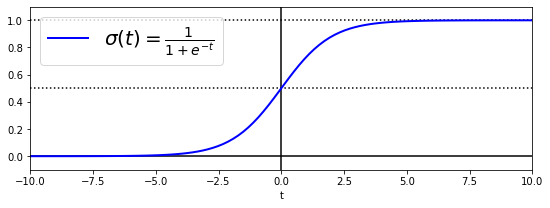

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

一旦实例x通过逻辑回归模型估算出概率$\hat{p}$，就可以轻松的计算出因变量y了

公式4-15：逻辑回归模型预测：

$$
\hat{y}=
\begin{cases}
0,&\hat{p}<0.5 \\ 
1,&\hat{p}\ge0.5 \\
\end{cases}
$$

联系逻辑回归函数图像可以发现：

   当$t<0$时，$\sigma{(t)}<0.5$，则$\hat{y}=0$
   
   当$t\ge0$时，$\sigma{(t)}\ge0.5$，则$\hat{y}=1$

# 4.6.2_训练和成本函数

训练的目的就是设置参数向量$\theta$，使得模型对正类实例做出高概率估算，对负类模型做出低概率估算

公式4-16：单个训练实例的成本函数

$$
c(\theta)=
\begin{cases}
-log(\hat{p}),&如果y=1 \\ 
-log(1-\hat{p}),&如果y=0 \\
\end{cases}
$$

解释：

如果模型估算一个正类实例（y=1）的概率（$\hat{p}$）接近于0，或者一个负类实例的概率接近于1，那么成本（c）将会变得很高。

反之，对一个负类实例估算出的概率接近于0，对于一个正类实例估算出的概率接近于1，而成本都接近0

    而整个训练集的成本是每个训练实例的平均成本，可以用一个被称为对数损失的单一表达式来表示。

公式4-17：逻辑回归成本函数（对数损失）

$$J(\theta)=-\frac{1}{m}\sum_{i=0}^m [y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$$

但是这个表达式没有已知的闭式方程，所有无法直接计算成本函数中的$\theta$的最小值，而又因为这个函数是凸函数，所以可以通过梯度下降计算全局最小值

# 4.6.3_决策边界

这里用鸢尾花植物数据来说明逻辑回归。这个知名的数据集中有150条数据，来自三个品种

In [26]:
#加载数据
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [27]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [28]:
# 首先基于花瓣宽度这一个特征，创建分类器，来检测维吉尼亚鸢尾

X = iris["data"][:,3:]   #花瓣宽度特征
y = (iris["target"] == 2).astype(np.int)  #2代表维吉尼亚鸢尾 输出1代表是，0代表否

In [29]:
# 训练模型
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


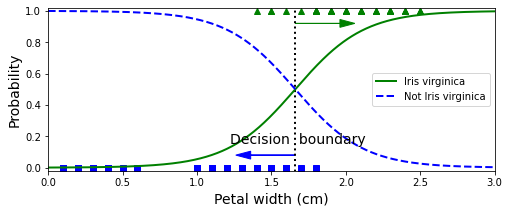

In [30]:
#假设有一些鸢尾花花瓣长度在0-3之间，模型估算出是否为维吉尼亚鸢尾花的概率：
%matplotlib inline
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.legend()

根据实际的统计，维吉尼亚鸢尾的花瓣宽度在1.4-2.5之间，而另外两种鸢尾的花瓣宽度在0.1-1.8之间，可以看出其中有重叠部分。

大于2的话分类器会坚定的认为“是”，小于1的话分类器也会坚定的认为“非是”，但是1-2之间分类器就不那么有把握。

    predict()方法可以直接返回所属的类别（0或1）
    predict_proba()方法则可以返回逻辑概率（0%-100%之间）

# 决策边界

结果显示：花瓣宽度在大约0-1.6时，模型认为该实例不是维吉尼亚鸢尾花，1.6-3是，1.6就是决策边界。

In [31]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

1.7为正类（1），1.5为负类（0）

接下来尝试显示由两个特征——花瓣长度和花瓣宽度组成的分类器

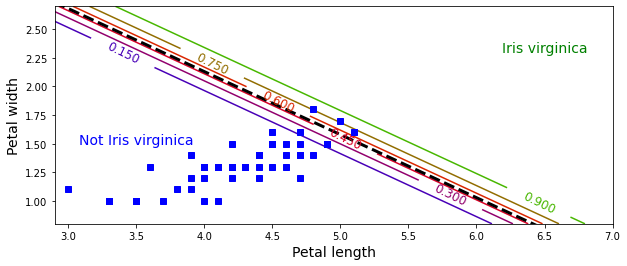

In [66]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:,(2,3)]  #花瓣长度、花瓣宽度
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs",C=10**10,random_state=42)
log_reg.fit(X,y)

x0,x1 = np.meshgrid(
        np.linspace(2.9,7,500).reshape(-1,1),
        np.linspace(0.8,2.7,200).reshape(-1,1)
    )
X_new = np.c_[x0.ravel(),x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10,4))
plt.plot(X[y==0,0],X[y==0,1],"bs")
plt.plot(X[y==1,1],X[y==1,1],'g^')

zz = y_proba[:,1].reshape(x0.shape)
contour = plt.contour(x0,x1,zz,cmap=plt.cm.brg)

left_right = np.array([2.9,7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour,inline=1,fontsize=12)
plt.plot(left_right,boundary,"k--",linewidth=3)
plt.text(3.5,1.5,"Not Iris virginica",fontsize=14,color='b',ha='center')
plt.text(6.5,2.3,"Iris virginica",fontsize=14,color='g',ha='center')
plt.xlabel("Petal length",fontsize=14)
plt.ylabel("Petal width",fontsize=14)
plt.axis([2.9,7,0.8,2.7])
plt.show()

虚线代表模型估算概率为50%的点，即决策边界，这里不同于之前是一个点，而是几条平行线。

每条平行线代表一个特定的概率，例如从左下到右上，被0.9的线分割为右上代表大于90%的概率是维吉尼亚鸢尾，被分割到左下的概率代表小于90%

# 4.6.4_Softmax回归（多元逻辑回归）

（多元逻辑回归和逻辑回归的关系与多元分类器和二元分类器的关系很像）
逻辑回归经过推广，不需要训练多个二元分类器，可以直接支持多个类别，这就是Softmax回归

#### 原理：

   对于每个实例x，在Softmax回归模型下，首先需要计算出每个类对该实例的分数$s_{k}(x)=x^T\theta^{(k)}$，然后对这几个分数应用softmax函数（归一化指数），从而估算出该实例在各分类中的概率，在哪个类中的概率最高就认为是哪个类。

#### 公式4-19：对于某类k的Softmax分数

$$s_{k}(x)=x^T\theta^{(k)}$$

   注意：关键就在于，每个类都有异于其它类的特定参数向量——$\theta^{(k)}$

之后就可以通过softmax函数(公式4-20)计算该实例在各类中的概率——$\hat{p_{k}}$

#### 公式4-20：Softmax函数

$$\hat{p_{k}}=\sigma(s(x))_{k}=\frac{exp(s_{k}(x))}{\sum_{j=1}^K exp(s_{j}(x))}\text{（该函数的含义就是计算每个分数的指数，之后进行归一化，最后返回的是概率）}$$

在此等式中：

·K代表类别

·$s_{x}$是一个向量，其中包含实例x在每个类中的softmax分数

·$\sigma(s(x))_{k}$是实例x对于某类k的估计概率

#### 公式4-21：Softmax回归分类预测

$$\hat{y} = \arg_{k}max \sigma{(s(x))_{k}}=\arg_{k}maxs_{k}(x)=\arg_{k}max((\theta^{(k)})^Tx)$$

    （argmax运算符返回的是函数得到最大值时的变量值）

在当前情况下，该公式不同于4-20返回的是概率，该公式返回的是使估计概率$\hat{p_{k}}$最大的类别k

    注意：Softmax一次只能预测一个类别，即是多类别，而不是多输出。

以上就是模型进行概率估算并做出预测的原理，以下是如何训练这个模型。

我们训练的目标是能对目标类做出高概率预测的模型，同时需要做出低概率预测时受到惩罚，我们可以通过交叉熵最小化来实现是这个目标。

# 交叉熵

公式4-22：交叉熵成本函数

$$J(\Theta)=-\frac{1}{m}\sum_{i=1}^m \sum_{k=1}^K y_{k}^{(i)}log(\hat{p}_{k}^{(i)})$$

接下来我们实际操作一下，我们用Softmax回归将鸢尾花分为三类。

scikit-learn的LogisticRegression默认选择的是一对多的训练方式，可以通过将超参数multi_class设置为multinomial的方式使其切换为softmax回归。另外你还得设置一个支持softmax的求解器，比如“lbfgs”求解器，默认使用lamda2，可以通过超参数c进行控制。

In [32]:
X = iris["data"][:,(2,3)]  #花瓣长度 花瓣宽度
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

训练完成，尝试预测一个花瓣长度为5cm，宽度为2cm的鸢尾花的类别

In [33]:
softmax_reg.predict([[5,2]])

array([2])

In [34]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

下图是三个类别的决策边界

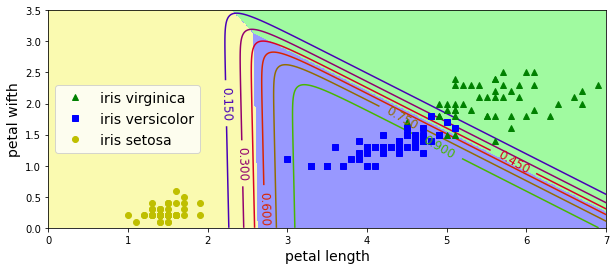

In [36]:
x0,x1 = np.meshgrid(
        np.linspace(0,8,500).reshape(-1,1),
        np.linspace(0,3.5,200).reshape(-1,1),
    )
X_new = np.c_[x0.ravel(),x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==2,0],X[y==2,1],"g^",label="iris virginica")
plt.plot(X[y==1,0],X[y==1,1],"bs",label="iris versicolor")
plt.plot(X[y==0,0],X[y==0,1],"yo",label="iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0,x1,zz,cmap=custom_cmap)
contour = plt.contour(x0,x1,zz1,cmap=plt.cm.brg)
plt.clabel(contour,inline=1,fontsize=12)
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal wifth",fontsize=14)
plt.legend(loc="center left",fontsize=14)
plt.axis([0,7,0,3.5])
plt.show()